In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenging Conditions

In [9]:
throughput = [1000, 2000, 10000]
th_jitter = [0, 250, 500, 1000]
latency = [1, 10, 100, 200]
lat_jitter = [0, 10, 30, 50]
loss = [0]

num_traces = 1000
call_duration_sec = 50
trace_gran_sec = 1

tput_thresh = 250
lat_thresh = 40000

In [10]:
def sample_uniform(list_of_values):
    n = len(list_of_values)
    idx = np.random.randint(n, size=1)[0]
    return list_of_values[idx]

In [11]:
def generate_trace(tput, tj, lat, lj, lo, idx):
    curr = 0
    trace_name = '_'.join(map(str, [tput, tj, lat, lj, lo, idx]))
    with open(f'no_loss_traces/{trace_name}.csv', 'w') as fd:
        while curr < call_duration_sec:
            tval = int(np.random.normal(tput, tj))
            lval = int(np.random.normal(lat, lj))
            if tval < tput_thresh: 
                tval = tput_thresh
            if lval > lat_thresh: 
                lval = lat_thresh
            if lval < 0:
                lval = 0
            fd.write(f'{tval},{lval},{lo}\n')
            curr += trace_gran_sec

In [13]:
idx = 1
for tput in throughput:
    for tj in th_jitter:
        for lat in latency:
            for lj in lat_jitter:
                for lo in loss:
                    generate_trace(tput, tj, lat, lj, lo, idx)
                    idx += 1

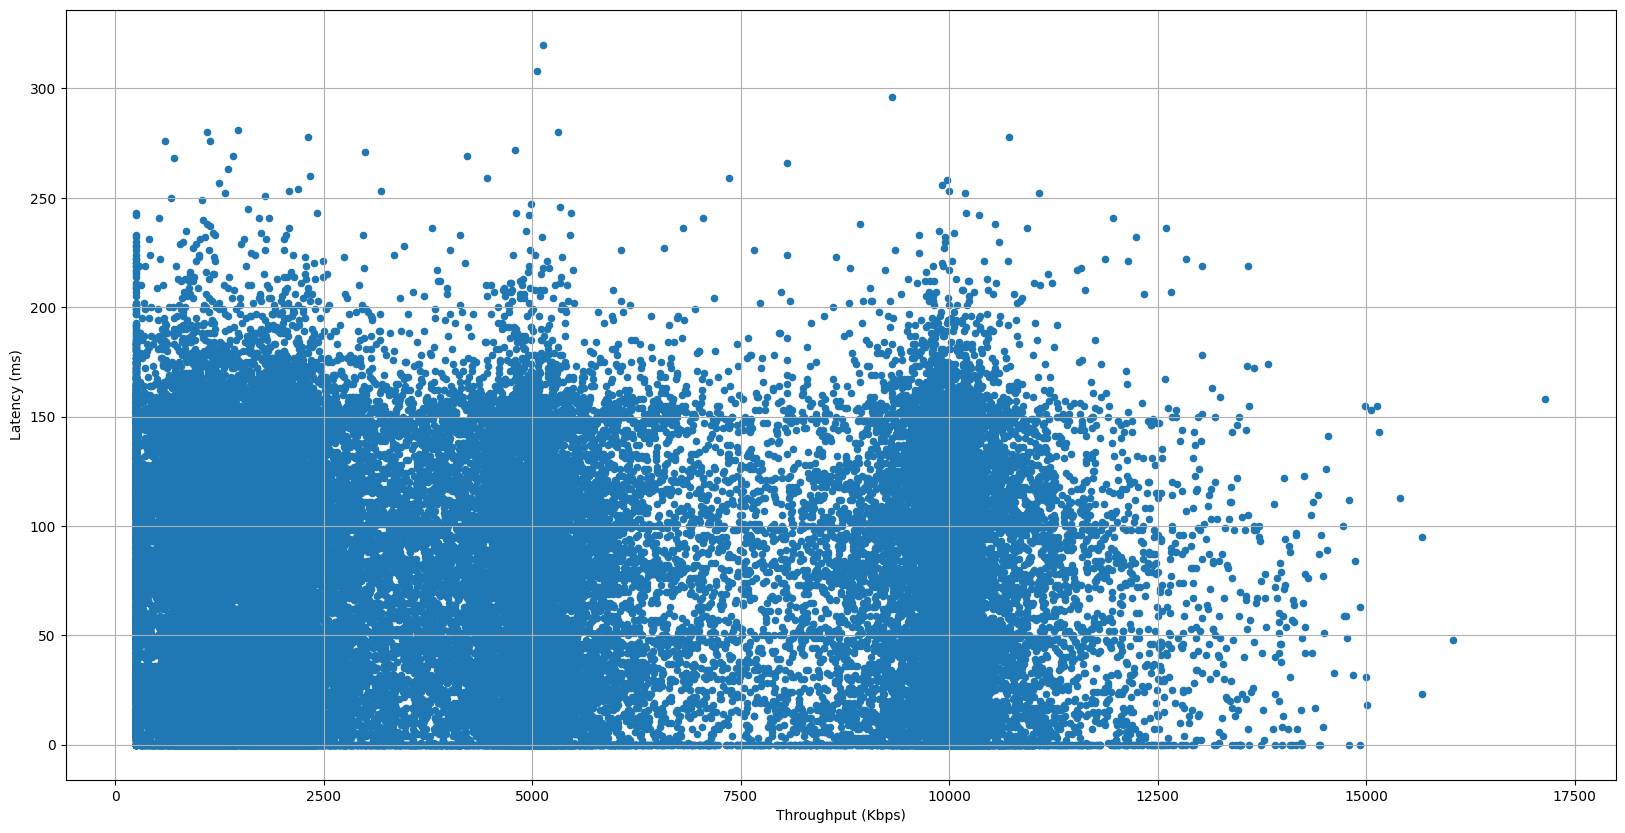

In [6]:
dfs = []
for csv_file in os.listdir('traces'):
    if csv_file.endswith('.csv'):
        df = pd.read_csv(f'traces/{csv_file}', names = ['Throughput (Kbps)', 'Latency (ms)', 'Loss (%)'])
        dfs.append(df)
df_merged = pd.concat(dfs, axis=0)

df_merged.plot.scatter('Throughput (Kbps)', 'Latency (ms)', figsize=(20, 10))
plt.grid(visible=1)
plt.show()

<AxesSubplot: xlabel='Throughput (Kbps)', ylabel='Proportion'>

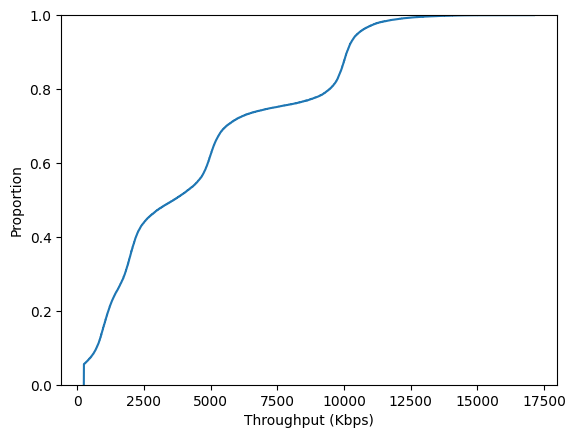

In [7]:
sns.ecdfplot(data=df_merged, x = 'Throughput (Kbps)')

<AxesSubplot: xlabel='Latency (ms)', ylabel='Proportion'>

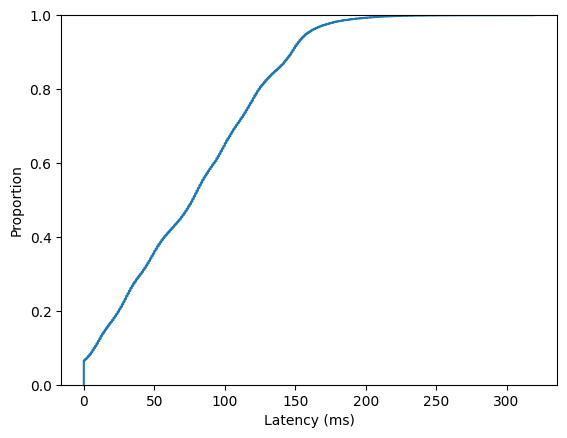

In [8]:
sns.ecdfplot(data=df_merged, x = 'Latency (ms)')

<AxesSubplot: xlabel='Loss (%)', ylabel='Proportion'>

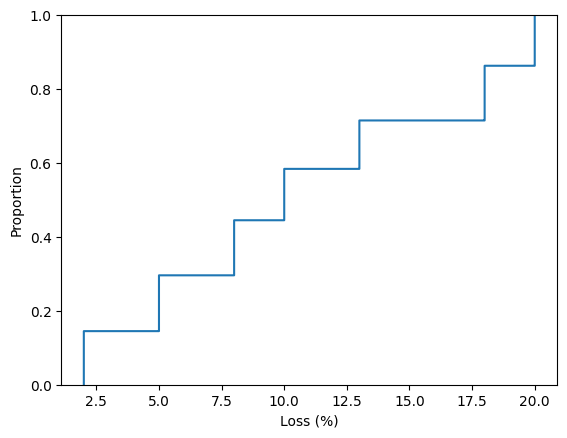

In [9]:
sns.ecdfplot(data=df_merged, x = 'Loss (%)')

## MLab traces

In [20]:
df = pd.read_csv('src/mlab_query_output.csv')
df.head(5)

,id,mean_throughput,throughput_jitter,mean_rtt,rtt_jitter,loss_rate
0,ndt-bffkt_1659581239_00000000001BA112,3.354509,0.035367,16.368941,4.003395,0
1,ndt-rzl2h_1659928409_000000000015F623,3.251966,0.044692,15.111618,3.984838,0
2,ndt-92q9k_1659852709_00000000000CAA8F,3.325471,0.046021,15.569529,3.845834,0
3,ndt-p46pt_1659663045_00000000001A92B6,3.462952,0.043970,14.648441,4.140331,0
4,ndt-mpzrl_1659590176_0000000000109A9E,3.311511,0.036750,15.990914,2.505184,0


In [23]:
def generate_trace_mlab(tput, tj, lat, lj, lo, loj, dur, idx):
    curr = 0
    trace_name = '_'.join(map(str, [tput, tj, lat, lj, lo, loj, dur, idx]))
    with open(f'mlab_no_loss/{trace_name}.csv', 'w') as fd:
        while curr < dur:
            tval = int(np.random.normal(tput, tj))
            lval = int(np.random.normal(lat, lj))
            if tval < tput_thresh: 
                tval = tput_thresh
            if lval > lat_thresh:
                lval = lat_thresh
            if lval < 0:
                lval = 0
            fd.write(f'{tval},{lval},{lo}\n')
            curr += 1

In [22]:
for idx, row in df.iterrows():
    tput = round(row['mean_throughput']*1000)
    tj = round(row['throughput_jitter']*1000)
    lat = round(row['mean_rtt']*100)
    lj = round(row['rtt_jitter']*100)
    lo = round(row['loss_rate']*100)
    loj = 0
    dur = sample_uniform(list(range(30, 61, 1)))
    generate_trace_mlab(tput, tj, lat, lj, lo, loj, dur, idx+1)